<h1 align=center><font size = 5><b>Diabetes prediction project</b></font></h1>

<h3 align=center><font size = 3><b>A project by Boris Y. Nedyalkov</b></font></h3>
<h3 align=center><font size = 3>With data from https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset</font></h3>

<center> <img src="https://maldita.es/uploads/images/2021/11/618e89365f697edittowfiqu-barbhuiya-zjak9jqxeda-unsplash-jpg.jpg" width=700, height=700 /></center> 

Image source: https://maldita.es/malditaciencia/20221114/preguntas-respuestas-diabetes/

### Data Analysis part

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("data_prepared_for_ML.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,334.2,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,56.2,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,32.2,238.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,150.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,26.4,122.4,30.1,0.349,47.0,1.0


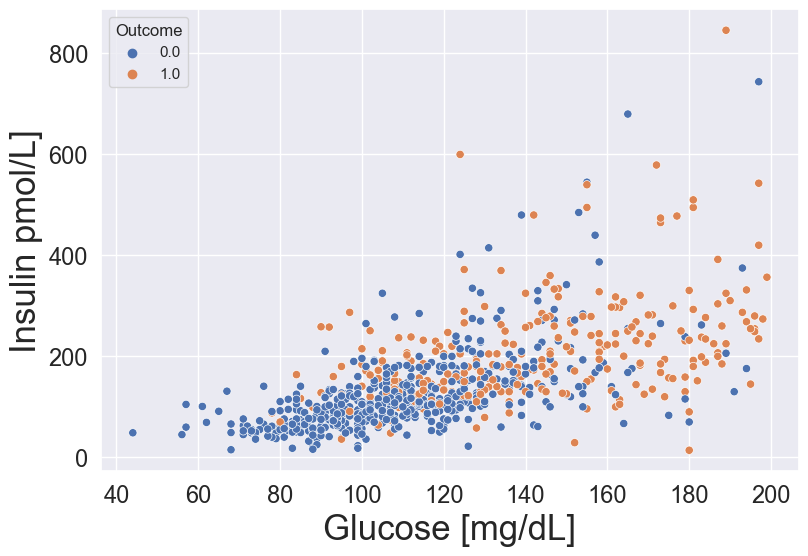

In [25]:
plt.figure(figsize=(9, 6), dpi = 100)
plot = sns.scatterplot(y='Insulin', x='Glucose', data=df, hue='Outcome', markers=True) 
plot.set_xlabel("Glucose [mg/dL]", fontsize=25)
plot.set_ylabel("Insulin pmol/L]", fontsize=25)
plot.tick_params(labelsize=17)
plt.savefig('weight_vs_year', transparent=True, bbox_inches='tight')
plt.show() 

In [5]:
def BoxAndBar(x_name, y_name, x_label=None, y_label=None, dataframe_name=df, dpi=120):
    
    if x_label == None:
        x_label = x_name
    if y_label == None:
        y_label = y_name
    
    plt.figure(figsize=(9, 5), dpi=dpi) # width and height in inches
    plot = sns.barplot(x=x_name, y=y_name, data=dataframe_name, errorbar = "sd", capsize = 0.1, estimator=np.mean)
    plot.set_xlabel(x_label,fontsize=24)
    plot.set_ylabel(y_label,fontsize=24)
    plot.tick_params(labelsize=17)
    #sns.move_legend(plot, "lower right")
    plt.savefig('{0}.png'.format(y_name), transparent=True, bbox_inches='tight')

    plt.figure(figsize=(6, 5), dpi=dpi) # width and height in inches
    plot2 = sns.boxplot(x=x_name, y=y_name, data=dataframe_name)
    plot2.set_xlabel(x_label,fontsize=22)
    plot2.set_ylabel(y_label,fontsize=22)
    plot2.tick_params(labelsize=17)
    #sns.move_legend(plot, "lower right")
    plt.savefig('box{0}.png'.format(y_name), transparent=True, bbox_inches='tight')
    plt.show() 

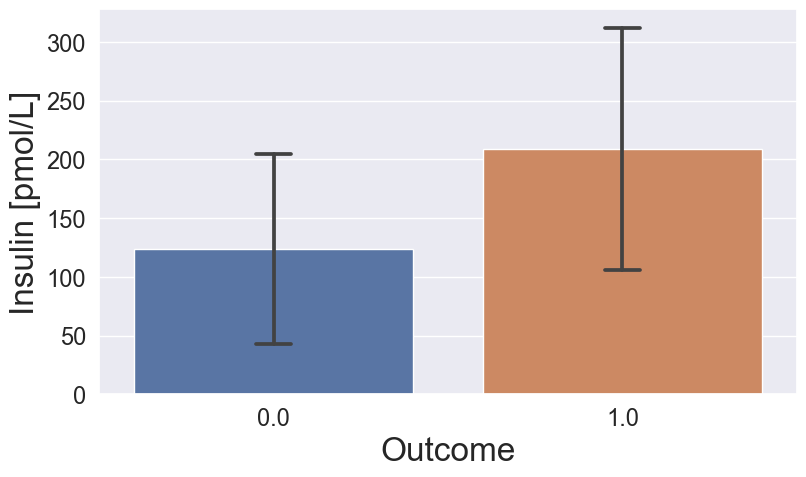

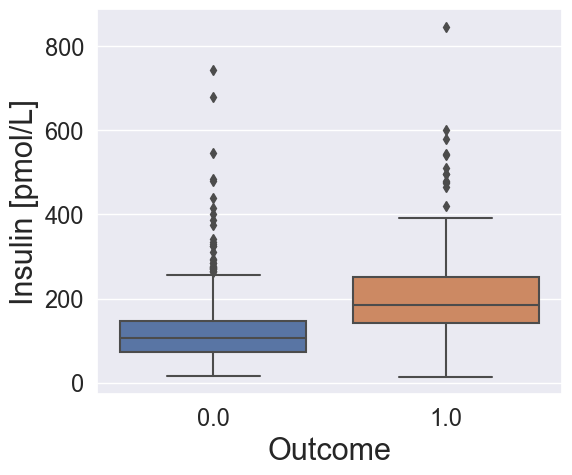

In [6]:
BoxAndBar(x_name='Outcome', y_name='Insulin', x_label=None, y_label='Insulin [pmol/L]', dpi=100)

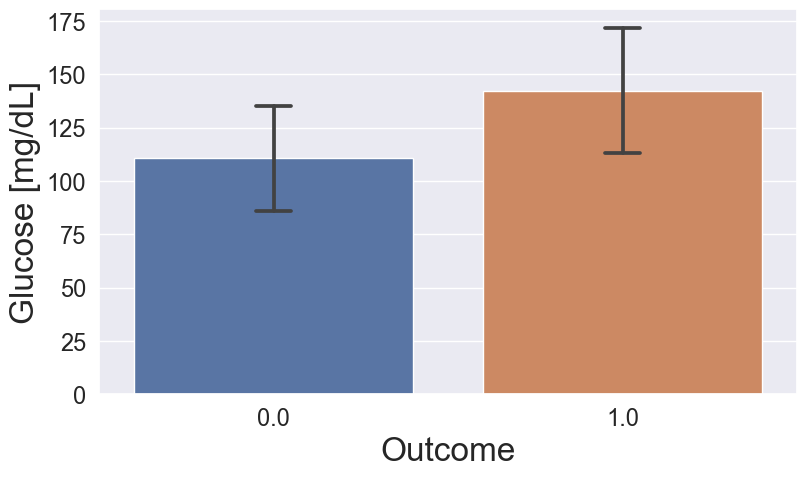

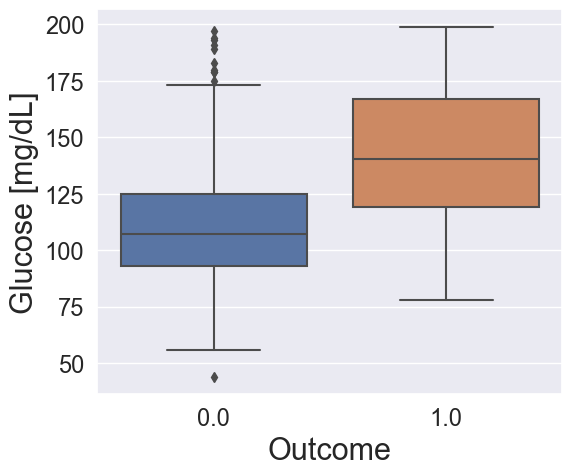

In [7]:
BoxAndBar(x_name='Outcome', y_name='Glucose', x_label=None, y_label='Glucose [mg/dL]', dpi=100)

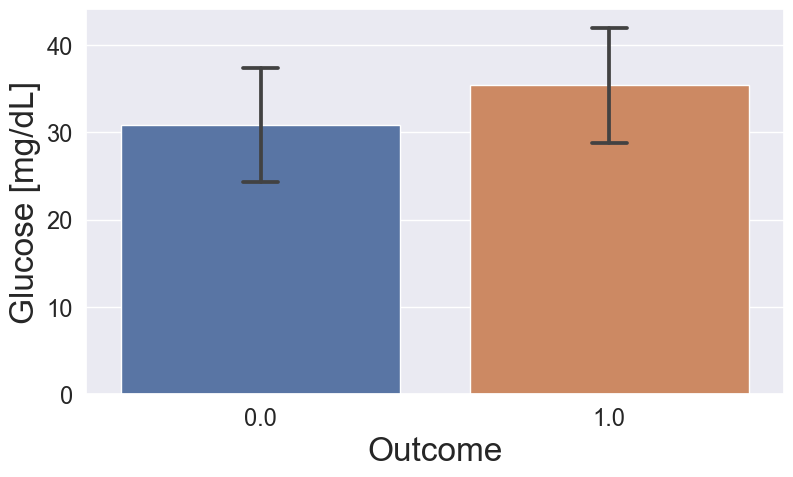

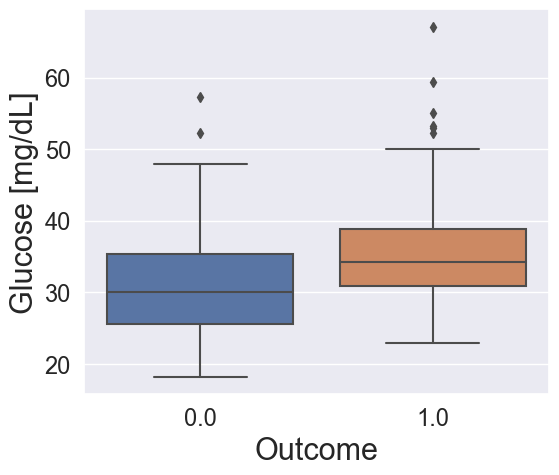

In [8]:
BoxAndBar(x_name='Outcome', y_name='BMI', x_label=None, y_label='Glucose [mg/dL]', dpi=100)

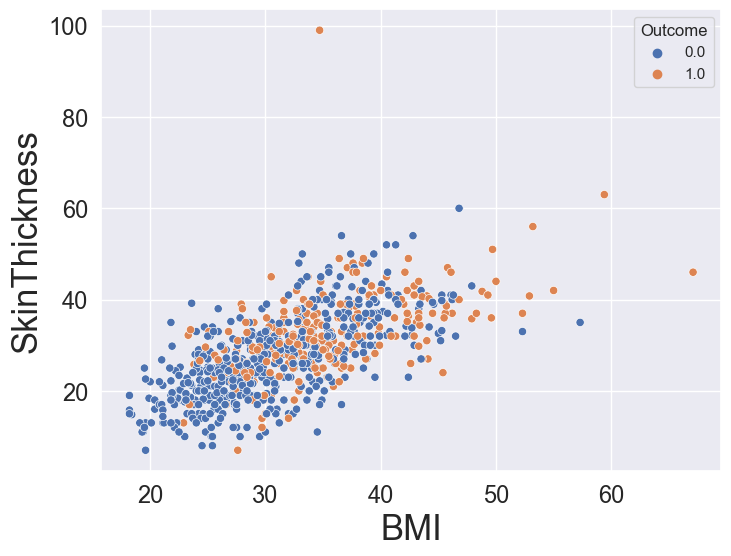

In [9]:
plt.figure(figsize=(8, 6), dpi = 100)
plot = sns.scatterplot(y='SkinThickness', x='BMI', data=df, hue='Outcome', markers=True) 
plot.set_xlabel("BMI", fontsize=25)
plot.set_ylabel("SkinThickness", fontsize=25)
plot.tick_params(labelsize=17)
plt.savefig('weight_vs_year', transparent=True, bbox_inches='tight')
plt.show() 

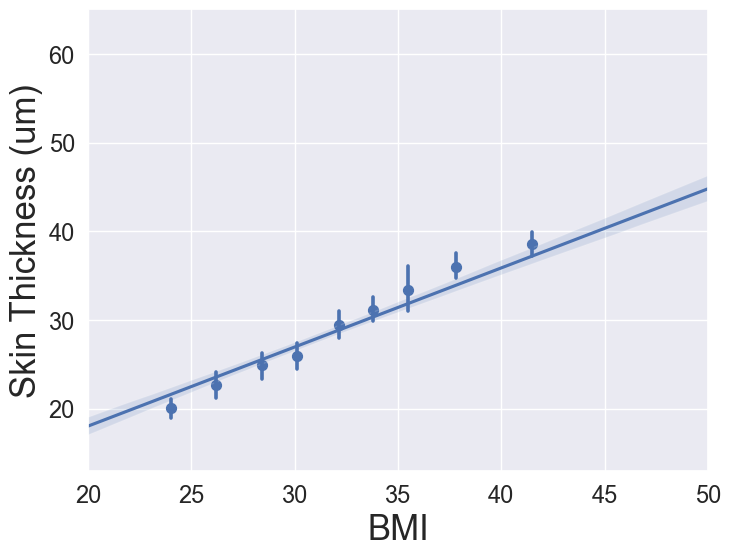

In [10]:
plt.figure(figsize=(8, 6), dpi = 100)
plot = sns.regplot(y='SkinThickness', x='BMI', data=df, x_ci='ci', x_bins=9) 
plot.set_xlabel("BMI", fontsize=25)
plot.set_ylabel("Skin Thickness (um)", fontsize=25)
plot.tick_params(labelsize=17)
plot.set_xlim([20, 50])
plt.savefig('skin_vs_bmi.png', transparent=True, bbox_inches='tight')
plt.show() 

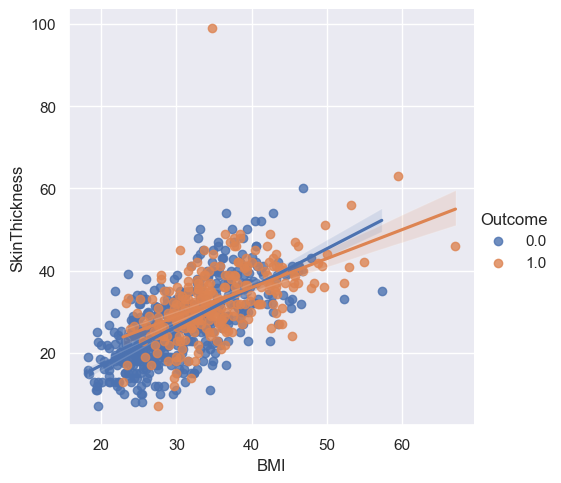

In [11]:
plot = sns.lmplot(y='SkinThickness', x='BMI', hue='Outcome', data=df) 

### Checking statistical significance with Welsh's T-test

In [12]:
from scipy.stats import levene, ttest_ind, mannwhitneyu, shapiro

def check_normality(grp, alpha=0.05):
    shapiro_p = shapiro(grp).pvalue
    if shapiro_p<alpha:
        print(f"Sampled from non-normal distribution (p-value={shapiro_p:.4f}) => Normality assumption is not met")
        return False
    else:
        print(f"Sampled from normal distribution (p-value={shapiro_p:.4f})  => Normality assumption is met")
        return True   

def check_mean_significance(grp1, grp2, alpha=0.05, alternative='two-sided'):  
    print("========== Checking for normality assumption for first group ==========")
    is_grp1_norm = check_normality(grp1, alpha=alpha)
    
    print("\n========== Checking for normality assumption for second group ==========")
    is_grp2_norm = check_normality(grp2, alpha=alpha)
        
    if is_grp1_norm & is_grp2_norm:        
        print("\n========== Checking for equality of population variance ==========")
        levene_pvalue = levene(grp1, grp2).pvalue
        if levene_pvalue < alpha:
            print(f"Groups have unequal variance (p-value = {levene_pvalue:.4f}) => Equal variance assumption is not met")
            equal_var=False
            test = "Welsch's t-test"
        else:
            print(f"Groups have equal variance (p-value = {levene_pvalue:.4f}) => Equal variance assumption is met")
            equal_var=True
            test = "Student's t-test"

        print(f"\n========== Checking for statistical significance of difference in means ({test}) ==========")
        t_pvalue = ttest_ind(grp1, grp2, equal_var=equal_var, alternative=alternative).pvalue
        if t_pvalue < alpha:
            print(f"We reject the null hypothesis (p-value = {t_pvalue:.4f}).")
        else:
            print(f"We do not reject the null hypothesis (p-value = {t_pvalue:.4f}).")

    else:
        print(f"\n========== Checking for statistical significance of difference in means (Mann-Whitney U Test) ==========")
        mw_pvalue = mannwhitneyu(grp1, grp2, alternative=alternative).pvalue
        if mw_pvalue < alpha:
            print(f"We reject the null hypothesis (p-value = {mw_pvalue:.4f})")
        else:
            print(f"We do not reject the null hypothesis (p-value = {mw_pvalue:.4f})")

In [13]:
set0 = df.Glucose[df.Outcome == 0]
set1= df.Glucose[df.Outcome == 1]

check_mean_significance(set0, set1)

========== Checking for normality assumption for first group ==========
Sampled from non-normal distribution (p-value=0.0000) => Normality assumption is not met

========== Checking for normality assumption for second group ==========
Sampled from non-normal distribution (p-value=0.0001) => Normality assumption is not met

========== Checking for statistical significance of difference in means (Mann-Whitney U Test) ==========
We reject the null hypothesis (p-value = 0.0000)


In [14]:
set0 = df.BMI[df.Outcome == 0]
set1= df.BMI[df.Outcome == 1]

check_mean_significance(set0, set1)

========== Checking for normality assumption for first group ==========
Sampled from non-normal distribution (p-value=0.0000) => Normality assumption is not met

========== Checking for normality assumption for second group ==========
Sampled from non-normal distribution (p-value=0.0000) => Normality assumption is not met

========== Checking for statistical significance of difference in means (Mann-Whitney U Test) ==========
We reject the null hypothesis (p-value = 0.0000)


In [15]:
set0 = df.DiabetesPedigreeFunction[df.Outcome == 0]
set1= df.DiabetesPedigreeFunction[df.Outcome == 1]

check_mean_significance(set0, set1)

========== Checking for normality assumption for first group ==========
Sampled from non-normal distribution (p-value=0.0000) => Normality assumption is not met

========== Checking for normality assumption for second group ==========
Sampled from non-normal distribution (p-value=0.0000) => Normality assumption is not met

========== Checking for statistical significance of difference in means (Mann-Whitney U Test) ==========
We reject the null hypothesis (p-value = 0.0000)


In [16]:
set0 = df.Pregnancies[df.Outcome == 0]
set1= df.Pregnancies[df.Outcome == 1]

check_mean_significance(set0, set1)

========== Checking for normality assumption for first group ==========
Sampled from non-normal distribution (p-value=0.0000) => Normality assumption is not met

========== Checking for normality assumption for second group ==========
Sampled from non-normal distribution (p-value=0.0000) => Normality assumption is not met

========== Checking for statistical significance of difference in means (Mann-Whitney U Test) ==========
We reject the null hypothesis (p-value = 0.0000)


In [17]:
###################################################################

## Histograms

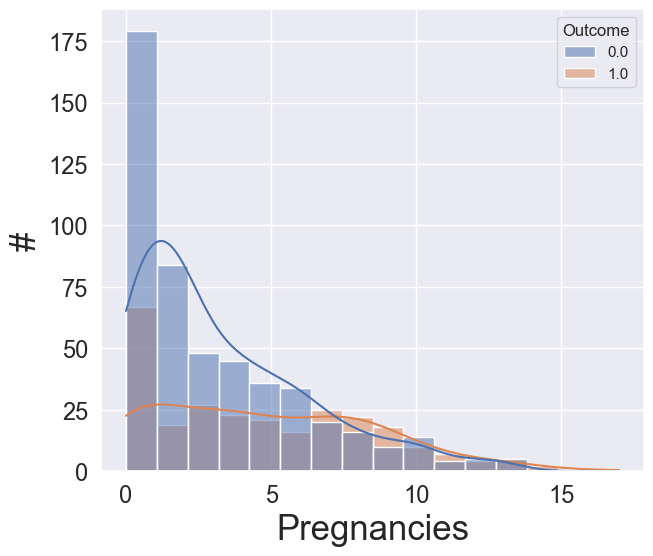

In [18]:
plt.figure(figsize=(7, 6), dpi=100) # width and height in inches
plot = sns.histplot(data=df, x='Pregnancies', hue='Outcome', kde=True)  
plot.set_xlabel("Pregnancies",fontsize=25)
plot.set_ylabel("#",fontsize=25)
plot.tick_params(labelsize=17)
plt.savefig('Pregnancies.png', transparent=True, bbox_inches='tight')
plt.show() 

In [19]:
def makeHist (x_name, hue, x_label=None, dataframe_name=df, dpi=100):
    
    if x_label == None:
        x_label = x_name
    
    plt.figure(figsize=(9, 6), dpi=100) # width and height in inches
    plot = sns.kdeplot(
       data=df, x=x_name, hue=hue,
       fill=True, common_norm=False, palette="tab10",
       alpha=.5, linewidth=0, warn_singular=False
    )
    plot.set_xlabel(x_label, fontsize=24)
    plot.set_ylabel("Density", fontsize=24)
    plot.tick_params(labelsize=17)
    plt.savefig(f'KDE_{x_name}.png', transparent=True, bbox_inches='tight')
    plt.show()

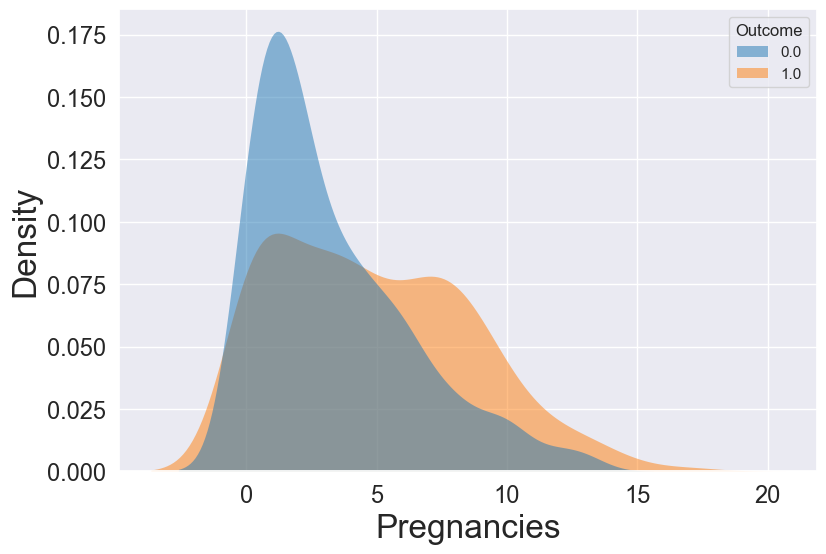

In [20]:
makeHist ('Pregnancies', "Outcome", dataframe_name=df, dpi=100)

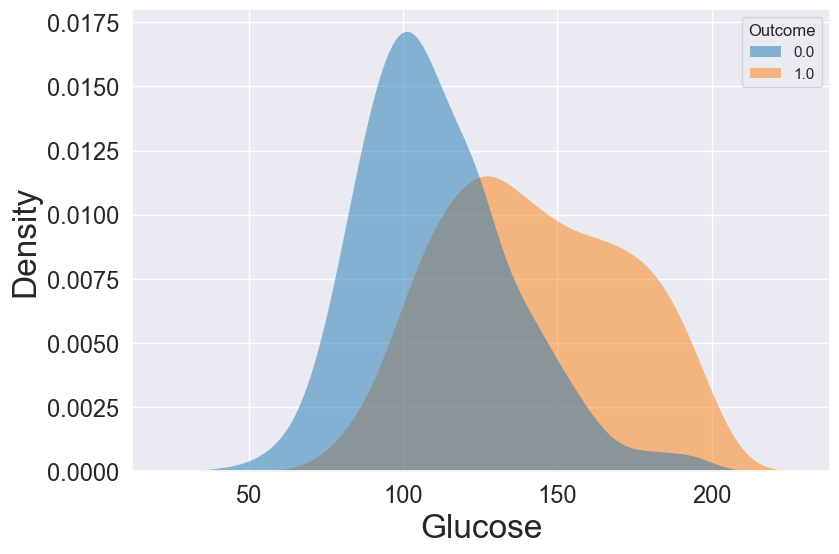

In [21]:
makeHist ('Glucose', "Outcome", dataframe_name=df, dpi=100)

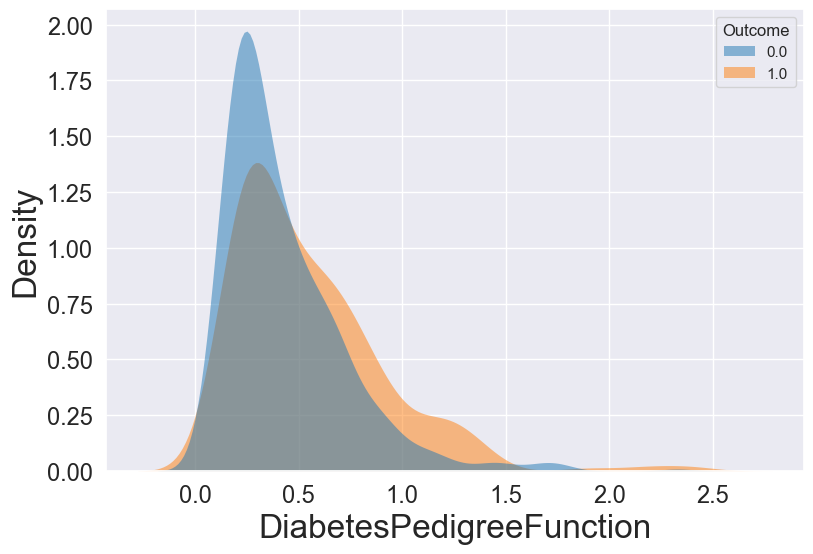

In [22]:
makeHist ('DiabetesPedigreeFunction', "Outcome", dataframe_name=df, dpi=100)

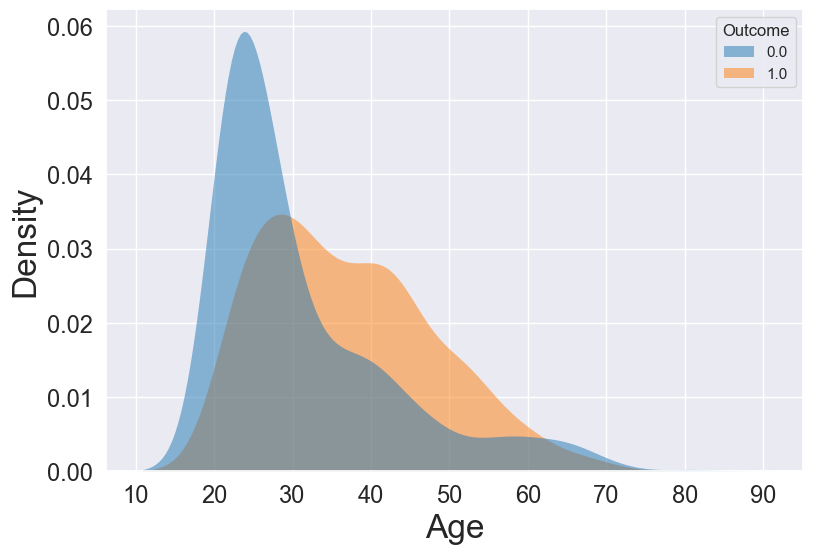

In [23]:
makeHist ('Age', "Outcome", dataframe_name=df, dpi=100)

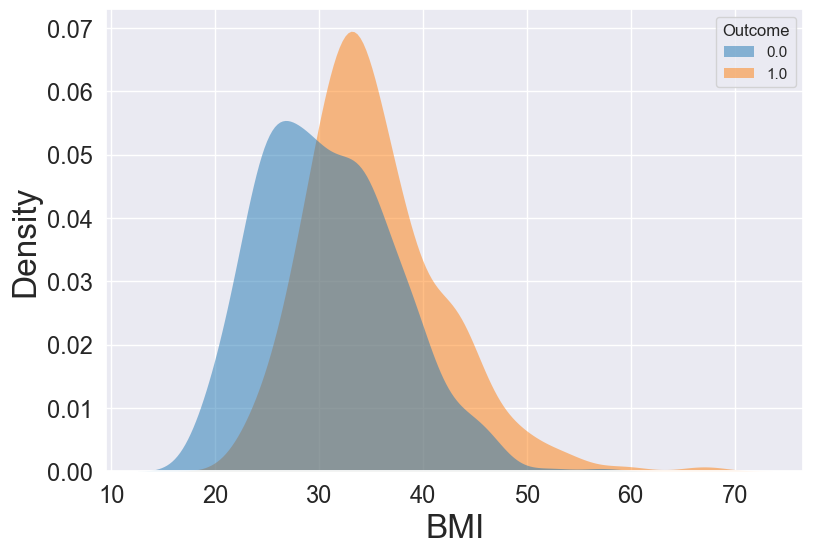

In [24]:
makeHist ('BMI', "Outcome", dataframe_name=df, dpi=100)